In [2]:
import pandas as pd
data = pd.read_csv('train.csv')
print data.head()
print data.describe()
print data.columns

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
       P

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So it looks like there's a lot of missing data in the age and cabin columns, so I need to figure out how to deal with that and make sure it doesn't mess up the data

In [4]:
data.Cabin.value_counts().sort_index()

A10      1
A14      1
A16      1
A19      1
A20      1
A23      1
A24      1
A26      1
A31      1
A32      1
A34      1
A36      1
A5       1
A6       1
A7       1
B101     1
B102     1
B18      2
B19      1
B20      2
B22      2
B28      2
B3       1
B30      1
B35      2
B37      1
B38      1
B39      1
B4       1
B41      1
        ..
E12      1
E121     2
E17      1
E24      2
E25      2
E31      1
E33      2
E34      1
E36      1
E38      1
E40      1
E44      2
E46      1
E49      1
E50      1
E58      1
E63      1
E67      2
E68      1
E77      1
E8       2
F E69    1
F G63    1
F G73    2
F2       3
F33      3
F38      1
F4       2
G6       4
T        1
Name: Cabin, dtype: int64

Let's make some plots to investigate possible relationships between variables?

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


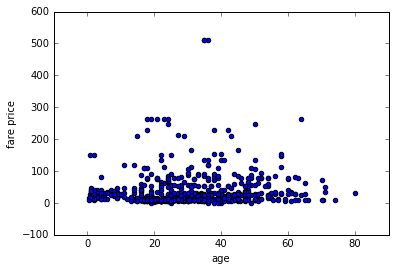

In [5]:
import numpy as np
import matplotlib.pyplot as plt

print data.columns

%matplotlib inline
plt.scatter(data.Age, data.Fare)
plt.xlabel('age')
plt.ylabel('fare price')
plt.show()

The purpose of this was mostly to try out using scatterplots, I didn't expect there to be a correlation between these two variables, and there really isn't much of one

In [6]:
print data.groupby(['Pclass']).mean()
print data.groupby(['Age']).mean()
print data.groupby(['Sex']).mean()
print data.groupby(['Fare']).mean()

        PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550
       PassengerId  Survived    Pclass     SibSp     Parch        Fare
Age                                                                   
0.42    804.000000  1.000000  3.000000  0.000000  1.000000    8.516700
0.67    756.000000  1.000000  2.000000  1.000000  1.000000   14.500000
0.75    557.500000  1.000000  3.000000  2.000000  1.000000   19.258300
0.83    455.500000  1.000000  2.000000  0.500000  1.500000   23.875000
0.92    306.000000  1.000000  1.000000  1.000000  2.000000  151.550000
1.00    415.428571  0.714286  2.714286  1.857143  1.571429   30.005957
2.00    346.900000  0.300000  2.600000  2.100000  1.300000   37.536250
3

In [19]:
children = data.Survived[data.Age <= 18]
adults = data.Survived[data.Age > 18]
females = data.Survived[data.Sex == 'female']
males = data.Survived[data.Sex == 'male']
male_children = data.Survived[data.Sex == 'male'][data.Age <=18]
female_children = data.Survived[data.Sex == 'female'][data.Age <=18]
male_adults = data.Survived[data.Sex == 'male'][data.Age>18]
female_adults = data.Survived[data.Sex == 'female'][data.Age>18]
print "PERCENT SUVIVAL RATE FOR DEMOGRAPHICS"
print "-------------------------------------"
print "children", children.mean()
print "adults", adults.mean()
print "males", males.mean()
print "females", females.mean()
print "male children", male_children.mean()
print "female children", female_children.mean()
print "male adults", male_adults.mean()
print "female adults", female_adults.mean()


PERCENT SUVIVAL RATE FOR DEMOGRAPHICS
-------------------------------------
children 0.503597122302
adults 0.382608695652
males 0.188908145581
females 0.742038216561
male children 0.338028169014
female children 0.676470588235
male adults 0.180628272251
female adults 0.782383419689


What we learn from this: just looking at children vs adults, children are more likely to survive vs adults.  Women are more likely to survive then men.  However, we then find that female adults are most likely to survive, followed by female children, followed by male children, followed last by male adults

In [8]:
print "PERCENT SUVIVAL RATE FOR CLASS"
print "-------------------------------------"
print "upper class", data.Survived[data.Pclass == 1].mean()
print "middle class", data.Survived[data.Pclass == 2].mean()
print "lower class", data.Survived[data.Pclass == 3].mean()

upper class 0.62962962963
middle class 0.472826086957
lower class 0.242362525458


Surprise surprse, the more upper class you are, the more likely you were to survive

In [9]:
print "PERCENT SUVIVAL RATE FOR PORT OF DEPARTURE"
print "-------------------------------------"
print "port c", data.Survived[data.Embarked == "C"].mean()
print "port s", data.Survived[data.Embarked == "S"].mean()
print "port q", data.Survived[data.Embarked == "Q"].mean()

port c 0.553571428571
port s 0.336956521739
port q 0.38961038961


I was curious about the ports variable, and it looks like people from Port C were most likely to survive

In [10]:
print "AVERAGE CLASS RATE FOR PORT OF DEPARTURE"
print "-------------------------------------"
print "port c", data.Pclass[data.Embarked == "C"].mean()
print "port s", data.Pclass[data.Embarked == "S"].mean()
print "port q", data.Pclass[data.Embarked == "Q"].mean()

port c 1.8869047619
port s 2.35093167702
port q 2.90909090909


But, if you look at the average socioeconomic level of each port, it looks like more rich people boarded at port C than the others, leading to its higher survival rate.

In [20]:
print "AVERAGE FARE FOR PORTS"
print "-------------------------------------"
print "port c", data.Fare[data.Embarked == "C"].mean()
print "port s", data.Fare[data.Embarked == "S"].mean()
print "port q", data.Fare[data.Embarked == "Q"].mean()

AVERAGE FARE FOR PORTS
-------------------------------------
port c 59.9541440476
port s 27.0798118012
port q 13.2760298701


Again, this sort of goes along with my Port C = rich people port hypothesis, people who boarded at Port C paid a significantly higher fare

In [21]:
print "AVERAGE FARE PER CLASS"
print "-------------------------------------"
print "upper class", data.Fare[data.Pclass == 1].mean()
print "middle class", data.Fare[data.Pclass == 2].mean()
print "lower class", data.Fare[data.Pclass == 3].mean()

AVERAGE FARE PER CLASS
-------------------------------------
upper class 84.1546875
middle class 20.6621831522
lower class 13.6755501018


This shows that, as expected, the upper class paid significantly higher fares than the middle or lower classes

In [29]:
print "PERCENT SUVIVAL RATE FOR FAR"
print "-------------------------------------"
print "under $10", data.Survived[data.Fare < 10].mean()
print "10 - 30", data.Survived[(data.Fare >=10) & (data.Fare < 30)].mean()
print "30 - 80", data.Survived[(data.Fare >=30) & (data.Fare < 80)].mean()
print "80 - 200", data.Survived[(data.Fare >=80) & (data.Fare < 200)].mean()
print "over 200", data.Survived[(data.Fare >=200) & (data.Fare < 600)].mean()

 PERCENT SUVIVAL RATE FOR FAR
-------------------------------------
under $10 0.199404761905
10 - 30 0.425396825397
30 - 80 0.5
80 - 200 0.803571428571
over 200 0.7


Again, as you might expect (given the correlation of all these factors with class), the more you paid for the ticket, the more likely you were to survive

In [13]:
data.groupby(['Pclass', 'Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [14]:
data['Child'] = data.Age <= 18
print data.Child.value_counts().sort_index()

False    752
True     139
Name: Child, dtype: int64


In [15]:
data.groupby(['Pclass', 'Sex', 'Child']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex    Child                                                         
1      female False   461.493976  0.975904  37.500000  0.542169  0.385542   
              True    527.454545  0.909091  15.181818  0.636364  1.000000   
       male   False   452.880342  0.350427  42.901042  0.299145  0.222222   
              True    522.400000  0.800000  10.184000  0.600000  1.600000   
2      female False   454.435484  0.903226  33.158333  0.483871  0.483871   
              True    392.928571  1.000000   9.714286  0.500000  1.142857   
       male   False   441.462366  0.086022  34.750000  0.311828  0.139785   
              True    488.266667  0.600000   8.288667  0.533333  0.733333   
3      female False   394.673267  0.495050  30.161017  0.702970  0.752475   
              True    411.604651  0.511628  10.209302  1.348837  0.906977   
       male   False   456.344595  0.121622  30.366337  0.273649  0.111486   
              True    450.705882  0.215686  11.223922  1.803922  0.882353   

                           Fare  
Pclass Sex    Child              
1      female False  103.296486  
              True   127.474245  
       male   False   65.199965  
              True   114.638320  
2      female False   21.271439  
              True    25.064286  
       male   False   18.713530  
              True    26.116947  
3      female False   15.585769  
              True    17.370835  
       male   False   11.287144  
              True    20.639055

I think this table really highlights the differences in class, sex, and age that make up the difference in survival rates.  Comparing the first to the third class is huge, but also in general comparing men to women is huge too.

In [16]:
data.groupby(['Pclass', 'Child', 'Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Child Sex                                                            
1      False female   461.493976  0.975904  37.500000  0.542169  0.385542   
             male     452.880342  0.350427  42.901042  0.299145  0.222222   
       True  female   527.454545  0.909091  15.181818  0.636364  1.000000   
             male     522.400000  0.800000  10.184000  0.600000  1.600000   
2      False female   454.435484  0.903226  33.158333  0.483871  0.483871   
             male     441.462366  0.086022  34.750000  0.311828  0.139785   
       True  female   392.928571  1.000000   9.714286  0.500000  1.142857   
             male     488.266667  0.600000   8.288667  0.533333  0.733333   
3      False female   394.673267  0.495050  30.161017  0.702970  0.752475   
             male     456.344595  0.121622  30.366337  0.273649  0.111486   
       True  female   411.604651  0.511628  10.209302  1.348837  0.906977   
             male     450.705882  0.215686  11.223922  1.803922  0.882353   

                           Fare  
Pclass Child Sex                 
1      False female  103.296486  
             male     65.199965  
       True  female  127.474245  
             male    114.638320  
2      False female   21.271439  
             male     18.713530  
       True  female   25.064286  
             male     26.116947  
3      False female   15.585769  
             male     11.287144  
       True  female   17.370835  
             male     20.639055

In [17]:
data.groupby('SibSp').mean()

,PassengerId,Survived,Pclass,Age,Parch,Fare,Child
SibSp,,,,,,,
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028,0.100329
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370,0.186603
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718,0.321429
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862,0.437500
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556,1.000000
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000,1.000000
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000,0.000000


In [42]:
print "mean survival with family:", data.Survived[(data.Parch > 0) | (data.SibSp > 0)].mean()
print "mean survival without family:", data.Survived[(data.Parch == 0) & (data.SibSp == 0)].mean()

mean survival with family: 0.505649717514
mean survival without family: 0.303538175047


Having family aboard seems to help your chances of survival.  I wonder if that's correlated with class or something?

In [43]:
print "mean class with family:", data.Pclass[(data.Parch > 0) | (data.SibSp > 0)].mean()
print "mean class without family:", data.Pclass[(data.Parch == 0) & (data.SibSp == 0)].mean()

mean class with family: 2.16949152542
mean class without family: 2.40037243948
